<a href="https://colab.research.google.com/github/MarcosAntonioDaSilva/Modelo-Previso/blob/main/ArquivoDeTeste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1° **Importação**

Importação de alguns modulos


*   O modulo pandas serve para criar e processar tabelas
*   O módulo sklearn é uma biblioteca do Python que oferece ferramentas simples e eficientes para análise preditiva de dados e aplicação prática de aprendizagem de máquina.


*   Importação do drive da conta que o colab esta conectado
*   NumPy é um pacote fundamental para computação científica com Python. É uma biblioteca do Python que fornece um objeto de array multidimensional, vários objetos derivados (como arrays mascarados e matrizes).







In [237]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from google.colab import drive
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from numpy.core.fromnumeric import mean
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from pandas.core.common import RandomState
from IPython.lib.security import random
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn import tree
import graphviz
from ipywidgets import interact
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor


# **2° Definição dos atributos**



1.   Monta o drive
2.   Faz a leitura das planilhas
3.   Define a planilha as colunas que vai ser de atributo de entrada e atributo de saida



In [238]:
drive.mount('/content/drive')

df_entrada = pd.read_excel('/content/drive/MyDrive/IC/Mix-1.xlsx')
df_saidaNaN = pd.read_excel('/content/drive/MyDrive/IC/planilha_de_saida.xlsx')

X_atributos_entrada = df_entrada.iloc[:,3:]

y_saida = df_saidaNaN.loc[:,'G1medS']

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **3° Imprimindo as colunas de entrada**

In [239]:
display(df_entrada)


,G1medS,G2MedS,G3MedS,En12-1,En3-1,En4-1,En34-1,Ios-1,darwin-1,Tahiti-1,TsmAS-1,TsmAN-1,Dipolo-1
0,1222.455036,638.857720,374.465113,25.76,26.83,28.16,26.87,0.5,8.4,12.5,27.22,25.20,-2.02
1,973.057143,476.182175,273.575054,27.93,28.20,28.79,28.27,-1.3,10.7,11.6,26.97,25.68,-1.29
2,860.485714,603.410490,366.226014,25.68,27.06,28.46,27.38,0.6,6.8,11.2,27.55,25.82,-1.73
3,1188.394401,646.110901,431.686073,26.34,26.19,27.16,26.08,1.1,7.3,12.5,27.28,24.79,-2.49
4,1107.257894,571.022247,358.223260,26.04,26.92,28.63,27.33,-0.4,8.3,10.7,27.17,25.39,-1.78
5,1024.277331,592.821992,280.292192,26.28,27.04,28.66,27.32,-0.7,9.5,11.5,27.04,25.21,-1.83
6,840.126437,364.346393,284.520720,27.73,28.26,28.96,28.66,-2.0,10.5,10.0,26.39,25.31,-1.08
7,713.042721,376.611528,216.208878,27.09,27.61,28.37,27.67,-0.5,10.1,12.5,26.77,25.28,-1.49
8,1376.985714,722.200054,439.263860,25.48,26.85,28.37,27.39,-0.7,9.4,11.4,27.19,25.01,-2.18
9,1206.357143,613.891667,322.029100,26.00,27.18,29.03,27.75,0.8,7.2,11.8,27.63,25.60,-2.03


# **4° Imprimindo as colunas de saida**

In [240]:
display(df_saidaNaN)


,canavieiras,jpessoa,maceio,Natal,Ppedras,Recife,Salvador,G1medS
0,681.28525,1314.6,1222.90000,1381.6,1202.40000,1936.5,817.900000,1222.455036
1,481.00000,1353.1,1029.20000,1008.5,782.00000,1325.3,832.300000,973.057143
2,306.10000,1210.9,769.70000,1118.1,201.50000,1729.4,687.700000,860.485714
3,672.88446,1685.5,1313.51620,675.4,1161.80118,1749.4,1060.258967,1188.394401
4,668.96469,1406.9,1264.75915,781.3,1113.68142,1662.1,853.100000,1107.257894
5,655.99308,1011.3,1103.40850,1065.6,954.43974,1373.2,1006.000000,1024.277331
6,644.85339,892.1,964.84465,807.7,817.68702,1125.1,628.600000,840.126437
7,619.40000,819.3,789.69905,548.1,610.40000,811.5,792.900000,713.042721
8,554.50000,2047.2,853.90000,1581.6,1398.90000,1766.0,1436.800000,1376.985714
9,893.50000,1380.9,1219.60000,1278.6,1106.60000,1382.3,1183.000000,1206.357143


# **5° Separando uma parte para treinamento e outra para teste**



*   X_train variavel de treinamento, X_test variavel de teste
*   Y_train variavel de treinamento, Y_test variavel de teste

utilizando a função train_test_split recebendo como parametro o atributo de entrada e os atributos de saida recebendo 90 % de treinamento.



In [241]:
X_train, X_test, y_train, y_test = train_test_split(X_atributos_entrada, y_saida, test_size=0.2)

# **6° Criando e treinando um modelo**

In [242]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

#7° é usada para fazer previsões usando o modelo treinado com o conjunto de dados de entrada x


In [243]:
previsoes = regressor.predict(X_test)

# **8° Imprime as previções arredondando os dados para duas casas decimais**

imprime também os dados de treinamento


In [244]:
print('')
print('')
previsoes.round(2)

array([ 917.85,  969.85,   94.85, 1199.85, 1316.54, 1190.47, 1012.85])

In [245]:
X_train

,En12-1,En3-1,En4-1,En34-1,Ios-1,darwin-1,Tahiti-1,TsmAS-1,TsmAN-1,Dipolo-1
30,27.83,28.74,29.39,28.90,-0.1,9.2,12.3,27.44,25.96,-1.48
2,25.68,27.06,28.46,27.38,0.6,6.8,11.2,27.55,25.82,-1.73
24,26.56,27.76,29.07,28.18,-0.7,8.9,10.9,27.87,26.77,-1.10
15,26.66,27.20,27.61,26.80,0.9,7.9,12.8,26.98,25.41,-1.57
17,26.42,27.39,28.92,27.65,-0.3,8.5,11.2,27.49,25.43,-2.06
26,26.65,27.02,27.56,26.67,0.7,6.3,10.8,26.77,25.32,-1.45
6,27.73,28.26,28.96,28.66,-2.0,10.5,10.0,26.39,25.31,-1.08
11,27.03,26.86,28.56,27.04,-0.4,8.6,11.0,26.26,25.33,-0.93
27,25.81,27.08,27.95,27.03,1.5,7.2,13.2,27.02,26.14,-0.88
13,26.45,26.68,26.98,26.33,1.3,6.3,11.9,27.00,25.49,-1.51


In [246]:
y_train

30     698.428571
2      860.485714
24     973.442857
15     853.357143
17     866.757143
26     767.514286
6      840.126437
11     876.442857
27    1163.728571
13     796.071429
0     1222.455036
8     1376.985714
19    1269.371429
20    1066.300000
29    1014.971429
14    1320.571429
3     1188.394401
1      973.057143
22    1136.656043
31    1380.928571
28     920.685714
10    1086.857143
21     968.492621
23    1429.871429
18    1183.300000
Name: G1medS, dtype: float64

# 9° Erro Médio Quadrado (Mean Squared Error - MSE) é a média dos erros quadrados

📌  MSE é uma métrica que "pune" erros grandes, é mais usada no mundo real.

MSE = (1/n) * ∑(y - ŷ)^2

Onde "n" é o número de previsões, "y" são os valores reais e "ŷ" são as previsões do modelo.






In [247]:
# mse= mean ((y_test - previsoes)**2)
# ("MSE", mse.round(2))


mse_y = mean_squared_error(y_test,previsoes)
("MSE:", mse_y.round(2))

('MSE:', 111335.76)

# 10° Modelo de Regressão Linear


In [248]:
# Carregar os dados
X = X_train
y = y_train

# Instanciar o Decision Tree Regressor, ou o modelo de regressão linear
model = DecisionTreeRegressor()

# Definir o cross-validator: 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True)

# Treinar o modelo com o conjunto de treinamento
model.fit(X_train, y_train)

# Avaliar o modelo usando cross_val_score
scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv)

# Converter os valores de erro quadrático médio negativos em positivos
mse_scores = -scores

# Calcular e exibir a média e o desvio padrão dos scores de MSE
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)

print(f'Mean MSE: {mean_mse:.3f} (+/- {std_mse:.3f})')

Mean MSE: 110386.483 (+/- 100665.503)


# 11° Modelo de Regressor aleatório de florestas




In [249]:
# Carregar os dados
X = X_train
y = y_train

# Instanciar o Decision Tree Regressor, Regressor aleatório de florestas
model = RandomForestRegressor()

# Definir o cross-validator: 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True)

# Treinar o modelo com o conjunto de treinamento
model.fit(X_train, y_train)

# Avaliar o modelo usando cross_val_score
scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv)

# Converter os valores de erro quadrático médio negativos em positivos
mse_scores = -scores

# Calcular e exibir a média e o desvio padrão dos scores de MSE
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)

print(f'Mean MSE: {mean_mse:.3f} (+/- {std_mse:.3f})')

Mean MSE: 57300.275 (+/- 53077.236)



# 12° Modelo de regressão por vetores suporte (SVR)

In [250]:
# Carregar os dados
X = X_train
y = y_train

# Instanciar o Decision Tree Regressor, regressão por vetores suporte
model = SVR()
# Definir o cross-validator: 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True)

# Treinar o modelo com o conjunto de treinamento
model.fit(X_train, y_train)

# Avaliar o modelo usando cross_val_score
scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv)

# Converter os valores de erro quadrático médio negativos em positivos
mse_scores = -scores

# Calcular e exibir a média e o desvio padrão dos scores de MSE
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)

print(f'Mean MSE: {mean_mse:.3f} (+/- {std_mse:.3f})')


Mean MSE: 47183.434 (+/- 36389.183)


#13° Modelo de Regressão baseada em vizinhos k-mais próximos.

In [251]:
# Carregar os dados
X = X_train
y = y_train

# Instanciar o Decision Tree Regressor, Regressão baseada em vizinhos k-mais próximos
model = KNeighborsRegressor(n_neighbors=12)

# Definir o cross-validator: 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True)

# Treinar o modelo com o conjunto de treinamento
model.fit(X_train, y_train)

# Avaliar o modelo usando cross_val_score
scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv)

# Converter os valores de erro quadrático médio negativos em positivos
mse_scores = -scores

# Calcular e exibir a média e o desvio padrão dos scores de MSE
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)

print(f'Mean MSE: {mean_mse:.3f} (+/- {std_mse:.3f})')


Mean MSE: 45829.362 (+/- 17068.715)


# 14° Modelo de regressão de Ridge é um método de estimação dos coeficientes de modelos de regressão múltipla em cenários

In [252]:
# Carregar os dados
X = X_train
y = y_train

# Instanciar o Decision Tree Regressor, Ridge
model = Ridge()

# Definir o cross-validator: 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Treinar o modelo com o conjunto de treinamento
# model.fit(X_train, y_train)

# Avaliar o modelo usando cross_val_score
scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv)

# Converter os valores de erro quadrático médio negativos em positivos
mse_scores = -scores

# Calcular e exibir a média e o desvio padrão dos scores de MSE
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)

print(f'Mean MSE: {mean_mse:.3f} (+/- {std_mse:.3f})')


Mean MSE: 64643.312 (+/- 78575.824)


# Podemos observar que o modelo que possui o menor erro e o KNeighborsRegressor

#15° Definição de parametro com os pesos uniforme e distancia
# criar de maneira sistemática diversas combinações dos parâmetros e depois de avaliá-los os armazenará num único objeto. e por fim treina e testa o modelo

In [253]:
# 2. Criar dados fictícios
#X, y = make_regression(n_samples=100, n_features=5, noise=0.3, random_state=42)

In [254]:
# 3. Definir parâmetros para o grid search
knn_params = {
    'n_neighbors': [1, 3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

In [255]:
# 4. Criar GridSearchCV para cada modelo
knn_model = KNeighborsRegressor()
cv = KFold(n_splits=10, shuffle=True, random_state=42)

In [256]:
knn_grid = GridSearchCV(knn_model, knn_params, cv=cv, verbose=1, n_jobs=-1)

In [257]:
# 5. Treinar e testar modelo
knn_grid.fit(X, y)
print("Melhores parâmetros para KNeighborsRegressor:", knn_grid.best_params_)
print("Melhor pontuação para KNeighborsRegressor:", knn_grid.best_score_)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
Melhores parâmetros para KNeighborsRegressor: {'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
Melhor pontuação para KNeighborsRegressor: -1.1311077493265806


## Arvore de decisão

In [258]:
#Xa, ya = make_regression(n_samples=10, n_features=5, noise=0.3, random_state=10)

In [259]:
# Criando o regressor de árvore de decisão
regressor = {
    'max_depth': [5,10,15,],
    'max_features': ['auto','sqrt'],
    'min_samples_leaf': [5,10,15],
    'min_samples_split': [2,5,8],
    #'n_estimators': [150, 200, 250]
    }

In [260]:
# Criando o regressor de árvore de decisão
regressor_model = DecisionTreeRegressor()

In [261]:
# Criando o objeto de busca em grade
grid_search = GridSearchCV(regressor_model, regressor, cv=10, verbose=1, n_jobs=-1)

In [262]:
# Treinando o regressor com os dados
grid_search.fit(X, y)

# Obtendo os melhores parâmetros e pontuação
melhores_parametros = grid_search.best_params_
melhor_pontuacao = grid_search.best_score_
print("Melhores parâmetros para DecisionTreeRegressor:", melhores_parametros)
print("Melhor pontuação para DecisionTreeRegressor:", melhor_pontuacao)

Fitting 10 folds for each of 54 candidates, totalling 540 fits
Melhores parâmetros para DecisionTreeRegressor: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 2}
Melhor pontuação para DecisionTreeRegressor: -2.923451739648065


In [263]:
# Criar um regressor de árvore de decisão para regressão
regressor = DecisionTreeRegressor()

# Treinar o regressor com os dados
regressor.fit(X, y)

# Gerar a representação gráfica da árvore de decisão
dot_data = tree.export_graphviz(regressor, out_file=None,
                                feature_names=['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Feature 5','Feature 6', 'Feature 7', 'Feature 8', 'Feature 9', 'Feature 10'],
                                filled=True, rounded=True,
                                special_characters=True)

# Criar um objeto graphviz a partir dos dados gerados
graph = graphviz.Source(dot_data)

# Renderizar o gráfico da árvore de decisão
graph.render("decision_tree_regression_graph1")

# Exibir o gráfico da árvore de decisão
graph.view()

'decision_tree_regression_graph1.pdf'

In [264]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline

class Identity(TransformerMixin, BaseEstimator):
    def __init__(self):
        pass

    def fit(self, X):
        return self

    def transform(self, X):
        return X

    def fit_transform(self, X, y=None):
        return X

In [265]:
# Cria uma lista com os modelos e os hiperparâmetros para testar
# Ela é formada de trios (<nome do modelo>, <classe do modelo>, <dicionário que mapeia nomes dos parâmetros na lista de valores>)
models = [
  ('Decision Tree', DecisionTreeRegressor(),
    {'max_depth': [5, 10, 15], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 5], 'max_features': ['sqrt', 'log2']}),

  ('Random Forest', RandomForestRegressor(),
    {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 15], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 5], 'max_features': ['sqrt', 'log2']}),

  ('Support Vector Machine', SVR(),
    {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']}),

  ('Gradient Boosting', GradientBoostingRegressor(),
    {'n_estimators': [20, 50, 100], 'max_depth': [2, 4, 6], 'learning_rate': [0.1, 0.01, 0.001], 'subsample':[0.8], 'loss': ['squared_error', 'absolute_error', 'huber']}),

  ('KNN Regressor', Pipeline([('scaler', RobustScaler()), ('knn', KNeighborsRegressor())]),
   {'scaler': [Identity(), StandardScaler(with_mean=True), StandardScaler(with_mean=False), MinMaxScaler()],
    'knn__n_neighbors': [3, 5, 7, 9, 11], 'knn__weights': ['uniform', 'distance'], 'knn__p': [1, 2]}),

  ('Linear Regression', Pipeline([('scaler', StandardScaler()), ('pred', LinearRegression())]),
    {'scaler': [Identity(), StandardScaler(with_mean=True), StandardScaler(with_mean=False), MinMaxScaler()]}),

('Rede Neural', Pipeline([('scaler', StandardScaler()), ('Model', MLPRegressor(hidden_layer_sizes=(100, 50),
                                                                             activation='relu', solver='adam',
                                                                             batch_size='auto', learning_rate='adaptive',
                                                                             alpha=0.0001, verbose=False,
                                                                             learning_rate_init=0.001, shuffle=True,
                                                                             power_t=0.5,
                                                                             validation_fraction=0.1, beta_1=0.9,
                                                                             beta_2=0.999,
                                                                             n_iter_no_change=10,
                                                                             max_iter=2000))]),
  {'scaler': [Identity(), StandardScaler(with_mean=True), StandardScaler(with_mean=False), MinMaxScaler()]})
]

In [266]:
# Dicionário para armazenar os resultados dos modelos
# Mapeia cada nome de modelo em seu melhor resultado
results = {}

# Aqui, guardamos o nome do melhor modelo de todos
best_model_name = None
best_score = None

# Separa em conjunto de treinamento com o grid-search (80%) e de teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X_atributos_entrada, y_saida, test_size=0.2)

# Loop pelos diferentes modelos
for (model_name, model, param_grid) in models:

  # Cria o grid search com validação cruzada non-nested
  grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

  # Treina o modelo
  grid_search.fit(X_train, y_train)
  score = -grid_search.best_score_

  # Mapeia o nome do modelo nos valores dos melhores parâmetros e no score (MSE) de validação cruzada obtido com eles
  results[model_name] = (score, grid_search.best_params_, grid_search.best_estimator_)

  # Imprime o nome do modelo, nome do conjunto de features, melhores hiperparâmetros e pontuação da avaliação cruzada
  print(f'Model: {model_name}, Best params: {grid_search.best_params_}, Validation score: {score:.4f}')

  if best_model_name is None or score < best_score:
    best_score = score
    best_model_name = model_name

Model: Decision Tree, Best params: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2}, Validation score: 23170.9382
Model: Random Forest, Best params: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}, Validation score: 36814.9088
Model: Support Vector Machine, Best params: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}, Validation score: 37053.1296
Model: Gradient Boosting, Best params: {'learning_rate': 0.1, 'loss': 'absolute_error', 'max_depth': 2, 'n_estimators': 20, 'subsample': 0.8}, Validation score: 44985.9581
Model: KNN Regressor, Best params: {'knn__n_neighbors': 7, 'knn__p': 1, 'knn__weights': 'distance', 'scaler': Identity()}, Validation score: 35719.3017
Model: Linear Regression, Best params: {'scaler': StandardScaler(with_mean=False)}, Validation score: 81840.0511


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10500) reached and the optimization hasn't converged yet.
  warnings.warn(


Model: Rede Neural, Best params: {'scaler': StandardScaler(with_mean=False)}, Validation score: 52921.5965


In [267]:
(score, params, best_model) = results[best_model_name]
print()
print(f'BEST RESULTS:')
print(f'-> model: {best_model_name}')
print(f'-> params: {params}')
print(f'-> validation score: {score:.4f}')
print()
assert score == best_score


BEST RESULTS:
-> model: Decision Tree
-> params: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2}
-> validation score: 23170.9382



In [268]:
best_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, max_features='sqrt', min_samples_leaf=2)

In [269]:
# Make predictions on the test data
y_predicted = best_model.predict(X_test)

# Evaluate the regressor
mse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 93610.48010251259
R-squared (R2): -1.1048544848434343


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


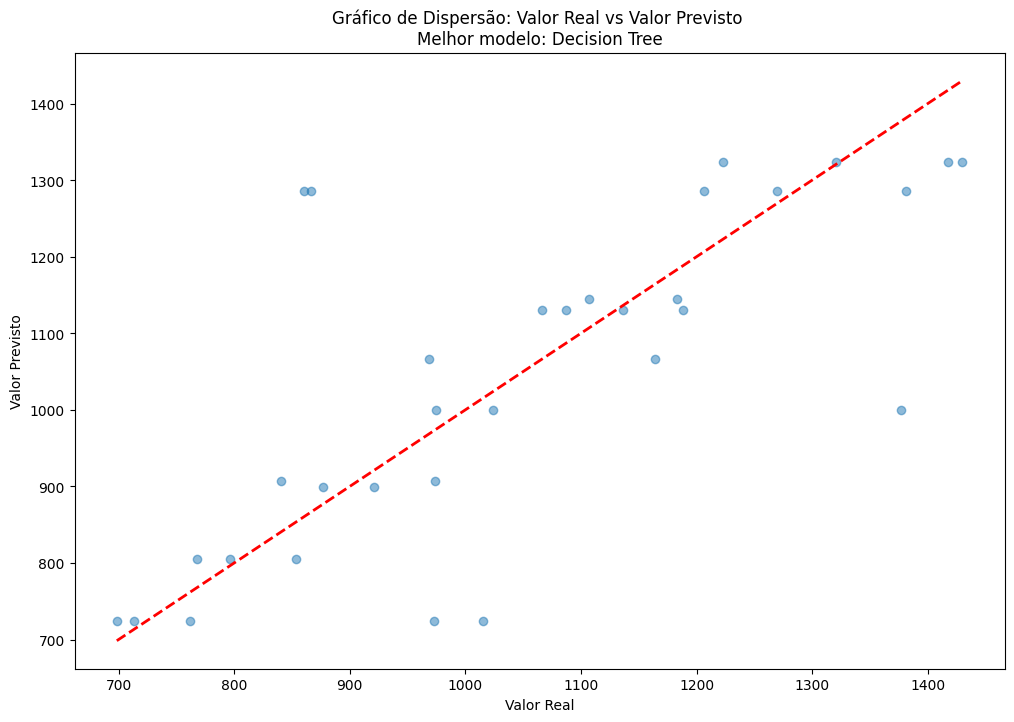

In [270]:
# Faz a predição de TODO os dados, com o melhor modelo
y_pred = best_model.predict(X_atributos_entrada.values)

# Plota o gráfico de "valor previsto" vs "valor real"
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(y_saida, y_pred, alpha=0.5)
ymin, ymax = min(y_saida.min(), y_pred.min()), max(y_saida.max(), y_pred.max())
ax.plot([ymin, ymax], [ymin, ymax], 'r--', lw=2)
ax.set_xlabel('Valor Real')
ax.set_ylabel('Valor Previsto')
ax.set_title(f'Gráfico de Dispersão: Valor Real vs Valor Previsto \nMelhor modelo: {best_model_name}')
plt.show()

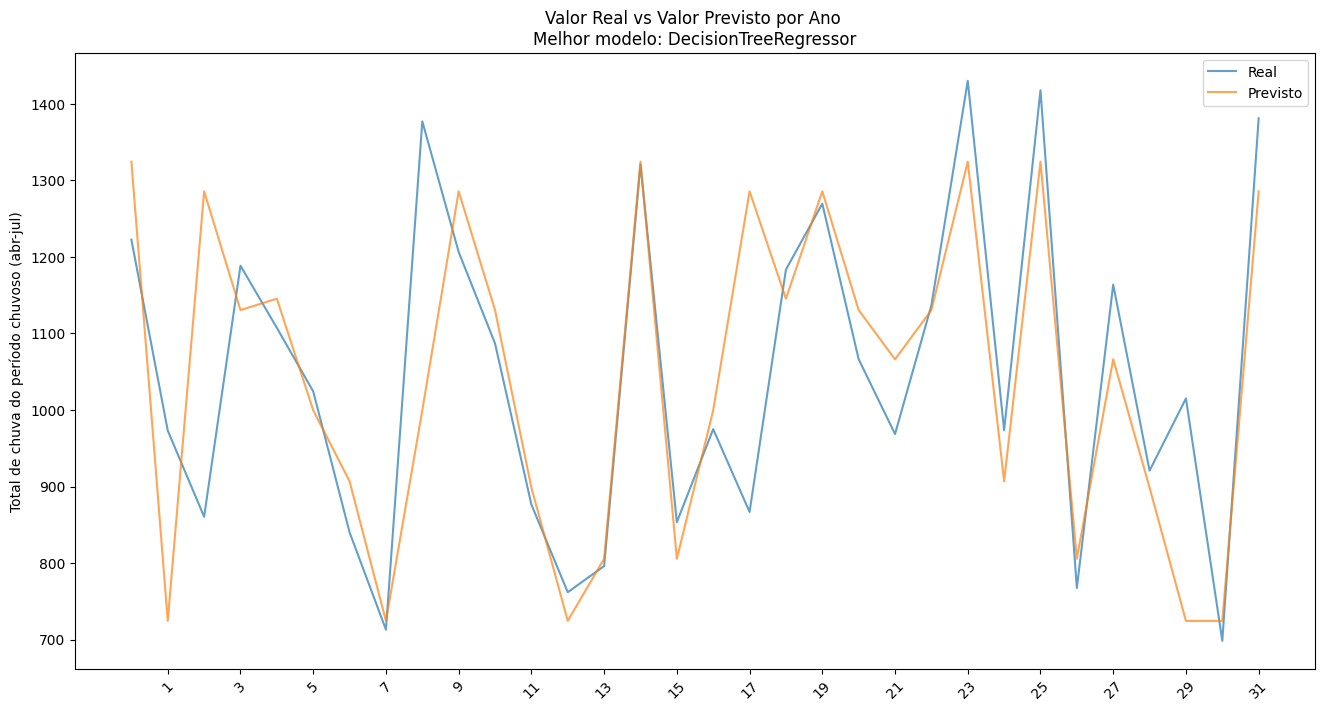

In [271]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(X_atributos_entrada.index, y_saida, alpha=0.7, label="Real")
ax.plot(X_atributos_entrada.index, y_pred, alpha=0.7, label="Previsto")
odd_years = X_atributos_entrada.index[(X_atributos_entrada.index % 2) == 1]
ax.set_xticks(odd_years)
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
#ax.set_xlabel('Ano')
ax.set_ylabel('Total de chuva do período chuvoso (abr-jul)')
ax.set_title(f'Valor Real vs Valor Previsto por Ano \nMelhor modelo: {best_model.__class__.__name__}')
ax.legend()
plt.show()